## Env

In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

| 항목 | 설명     |
|-----|----------|
| X1  | 작업번호 |
| X2  | 마킹길이 |
| X3  | 절단길이 |
| X4  | 철판두께 |
| X5  | 철판재질 |
| X6  | 절단갯수 |
| X7  | 작업장   |
| X8  | 작업자   |
| Y1  | 마킹시간 |
| Y2  | 절단시간 |


In [ ]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
train = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\HD_CNC\train.csv')
test = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\HD_CNC\test.csv')

display(train.head())
display(test.head())

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,134764,56.3,67.5,22.5,AH32,4,97,PL973,467,2241
1,9854,115.0,67.0,13.0,AH32,2,27,PL271,1058,1163
2,94365,59.2,44.6,18.0,AH32-TM,1,14,PL141,270,1094
3,110641,52.1,97.4,15.0,A,17,24,PL242,391,2604
4,100159,42.9,58.7,14.5,A,4,23,PL233,232,1564


,Id,X1,X2,X3,X4,X5,X6,X7,X8
0,0,158065,80.6,104.8,11.0,A,29,23,PL234
1,1,65927,141.8,34.2,17.5,A,2,91,PL911
2,2,117029,77.2,103.3,17.0,A,10,97,PL973
3,3,50866,95.5,131.0,18.0,A,2,23,PL234
4,4,151900,91.7,36.1,19.0,AH32,1,27,PL271


## Preprocessing

In [4]:
train = train.rename(columns = {
    'X1' : '작업번호',
    'X2' : '마킹길이',
    'X3' : '절단길이',
    'X4' : '철판두께',
    'X5' : '철판재질',
    'X6' : '절단갯수',
    'X7' : '작업장',
    'X8' : '작업자',
    'Y1' : '마킹시간',
    'Y2' : '절단시간'
})

test = test.rename(columns = {
    'X1' : '작업번호',
    'X2' : '마킹길이',
    'X3' : '절단길이',
    'X4' : '철판두께',
    'X5' : '철판재질',
    'X6' : '절단갯수',
    'X7' : '작업장',
    'X8' : '작업자'
})

In [5]:
train['철판재질'] = pd.factorize(train['철판재질'])[0]
train['작업자'] = pd.factorize(train['작업자'])[0]

test['철판재질'] = pd.factorize(test['철판재질'])[0]
test['작업자'] = pd.factorize(test['작업자'])[0]

In [6]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121754 entries, 0 to 121753
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   작업번호    121754 non-null  int64  
 1   마킹길이    121754 non-null  float64
 2   절단길이    121754 non-null  float64
 3   철판두께    121754 non-null  float64
 4   철판재질    121754 non-null  int64  
 5   절단갯수    121754 non-null  int64  
 6   작업장     121754 non-null  int64  
 7   작업자     121754 non-null  int64  
 8   마킹시간    121754 non-null  int64  
 9   절단시간    121754 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 9.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40571 entries, 0 to 40570
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      40571 non-null  int64  
 1   작업번호    40571 non-null  int64  
 2   마킹길이    40571 non-null  float64
 3   절단길이    40571 non-null  float64
 4   철판두께    40571 non-null  float64
 5   철판재질    40571 non-null  int64  
 6   절단갯수    40571 non-null  int64  
 7   작업장     40571 non-null  int64  
 8   작업자     40571 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 2.8 MB


None

In [7]:
display(train)

test.drop(columns = ['Id'], inplace = True)
display(test)

,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,작업자,마킹시간,절단시간
0,134764,56.3,67.5,22.5,0,4,97,0,467,2241
1,9854,115.0,67.0,13.0,0,2,27,1,1058,1163
2,94365,59.2,44.6,18.0,1,1,14,2,270,1094
3,110641,52.1,97.4,15.0,2,17,24,3,391,2604
4,100159,42.9,58.7,14.5,2,4,23,4,232,1564
...,...,...,...,...,...,...,...,...,...,...
121749,147050,98.4,89.5,10.0,76,8,21,9,906,1226
121750,151590,48.0,51.0,23.0,77,1,23,18,175,1540
121751,152421,42.5,30.2,34.0,78,5,27,22,376,1492
121752,161172,22.1,15.3,36.0,64,8,97,0,85,723


,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,작업자
0,158065,80.6,104.8,11.0,0,29,23,0
1,65927,141.8,34.2,17.5,0,2,91,1
2,117029,77.2,103.3,17.0,0,10,97,2
3,50866,95.5,131.0,18.0,0,2,23,0
4,151900,91.7,36.1,19.0,1,1,27,3
...,...,...,...,...,...,...,...,...
40566,112358,27.0,13.0,19.0,1,21,25,24
40567,150907,44.2,41.3,19.5,1,2,14,11
40568,57481,54.9,70.5,15.0,0,10,23,16
40569,48467,44.1,43.2,16.0,0,1,27,20


In [8]:
display(train.describe())
display(test.describe())

,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,작업자,마킹시간,절단시간
count,121754.000000,121754.000000,121754.000000,121754.000000,121754.000000,121754.000000,121754.000000,121754.000000,1.217540e+05,121754.000000
mean,81048.692675,77.608615,73.875636,17.444897,2.339816,13.630049,43.921152,13.363922,8.971671e+02,2193.206638
std,46870.157635,48.006125,53.267359,4.498316,4.120459,20.751914,32.509414,8.269139,4.604704e+04,2299.585390
min,1.000000,3.200000,1.800000,6.000000,0.000000,1.000000,14.000000,0.000000,0.000000e+00,0.000000
25%,40428.250000,45.200000,40.900000,14.500000,0.000000,1.000000,22.000000,6.000000,2.380000e+02,1064.000000
50%,81043.500000,68.100000,52.800000,17.000000,2.000000,4.000000,25.000000,12.000000,3.790000e+02,1593.000000
75%,121554.750000,98.300000,93.000000,20.000000,2.000000,18.000000,91.000000,21.000000,5.480000e+02,2778.000000
max,162341.000000,524.400000,621.300000,40.000000,78.000000,416.000000,97.000000,28.000000,6.157364e+06,348262.000000


,작업번호,마킹길이,절단길이,철판두께,철판재질,절단갯수,작업장,작업자
count,40571.000000,40571.000000,40571.000000,40571.000000,40571.000000,40571.000000,40571.000000,40571.000000
mean,81536.254122,78.408661,73.741996,17.488975,1.564837,13.451209,43.929161,12.575436
std,46845.236185,48.351212,53.069122,4.505772,3.556288,20.591742,32.503838,8.109459
min,4.000000,3.700000,1.100000,6.000000,0.000000,1.000000,14.000000,0.000000
25%,41100.500000,45.700000,41.000000,14.500000,0.000000,1.000000,22.000000,6.000000
50%,81500.000000,68.700000,52.500000,17.000000,1.000000,4.000000,25.000000,12.000000
75%,122412.500000,99.700000,92.700000,20.000000,1.000000,18.000000,91.000000,19.000000
max,162338.000000,445.300000,621.300000,36.000000,50.000000,262.000000,97.000000,28.000000


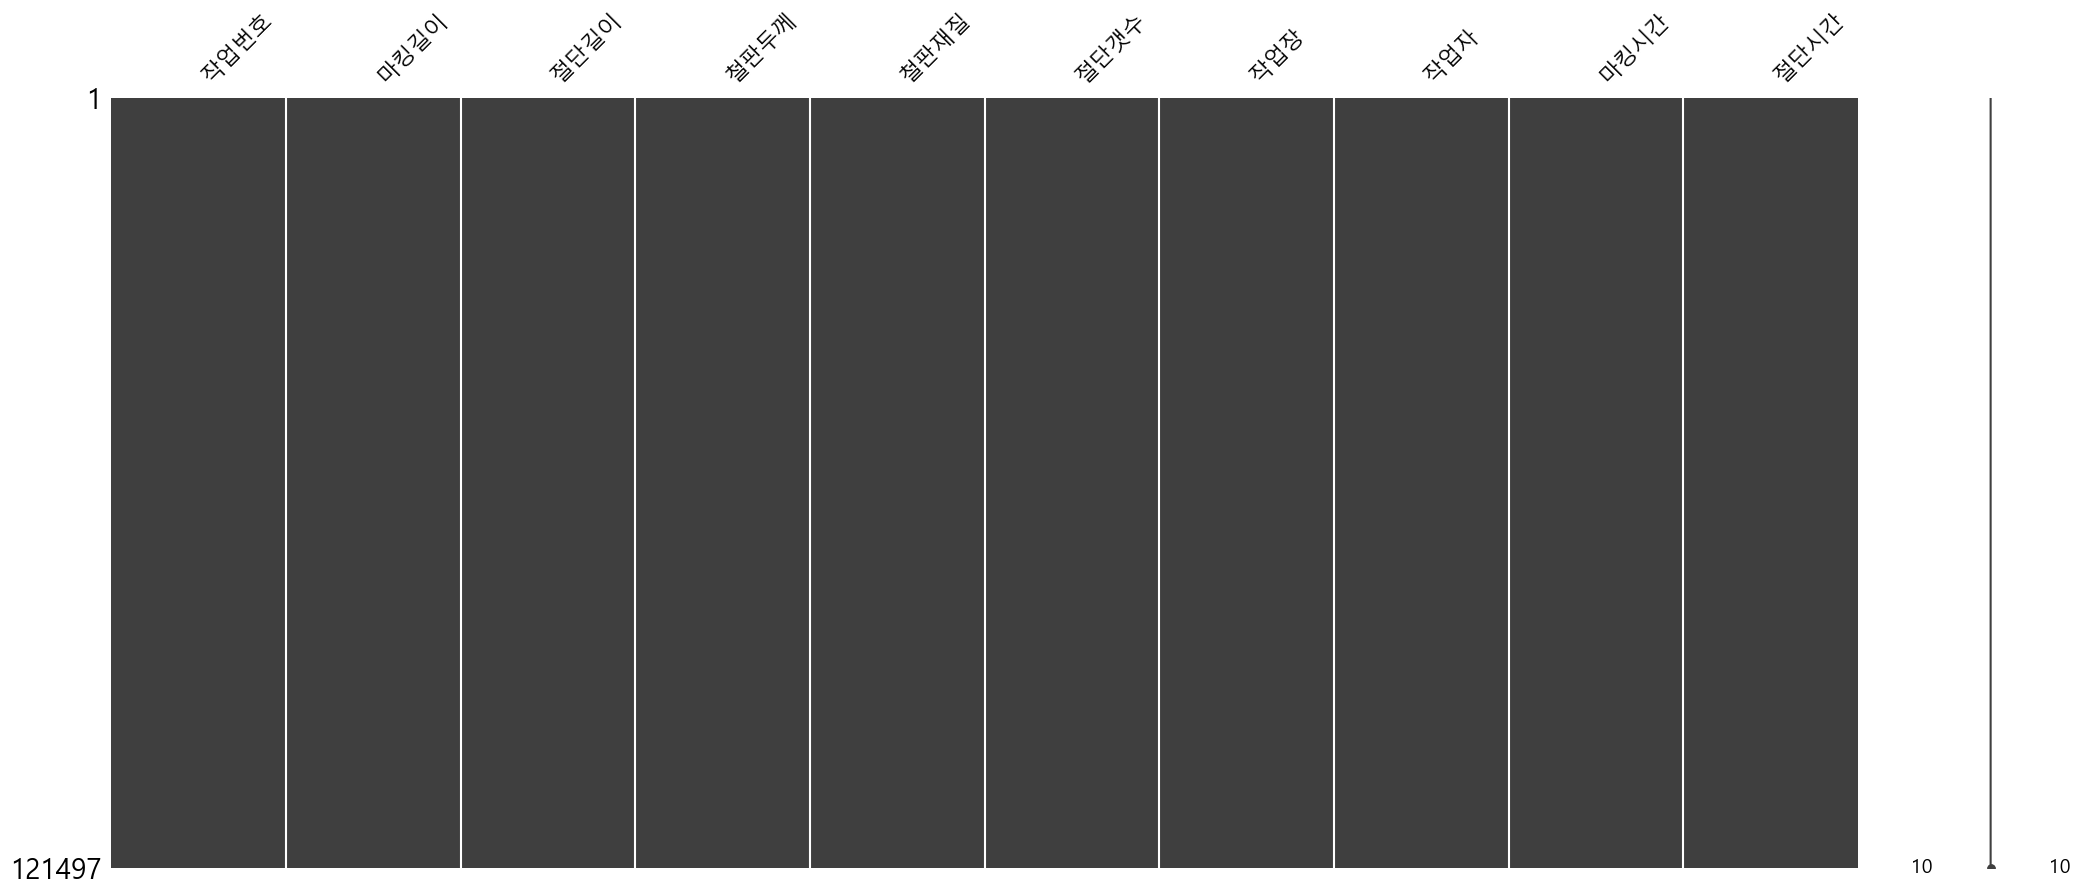

In [39]:
ms.matrix(train)

plt.show()

## EDA

<Axes: >

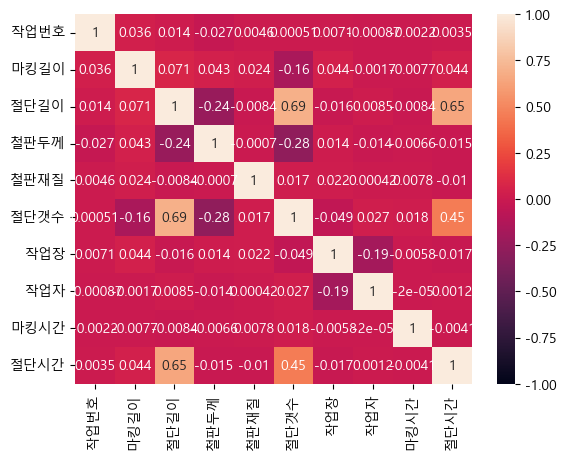

In [9]:
sns.heatmap(train.corr(), vmax = 1, vmin = -1, annot = True)

In [10]:
# sns.pairplot(train)

<Figure size 2000x2000 with 0 Axes>

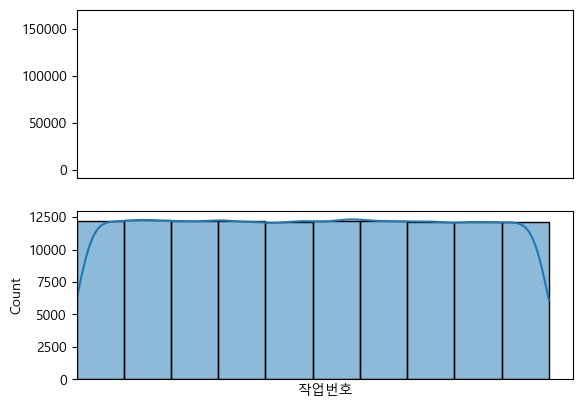

<Figure size 2000x2000 with 0 Axes>

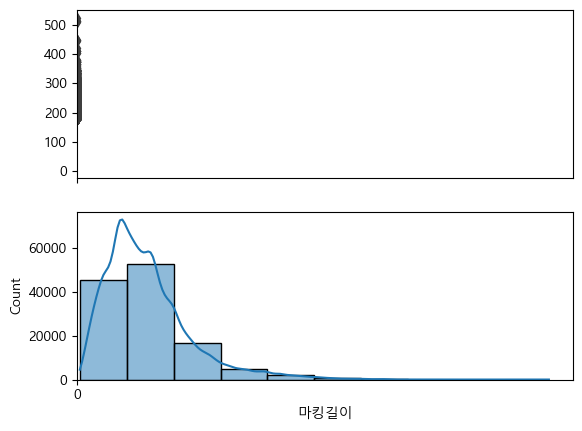

<Figure size 2000x2000 with 0 Axes>

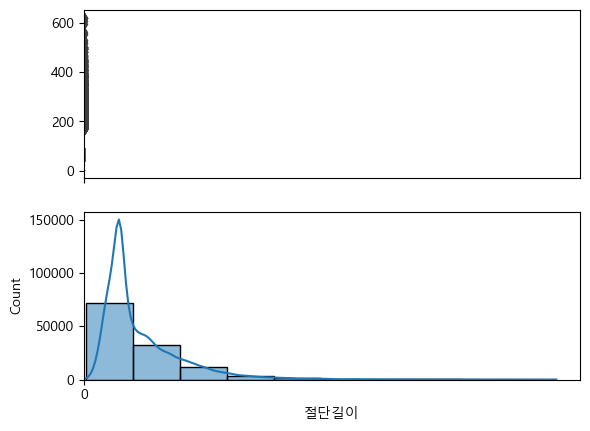

<Figure size 2000x2000 with 0 Axes>

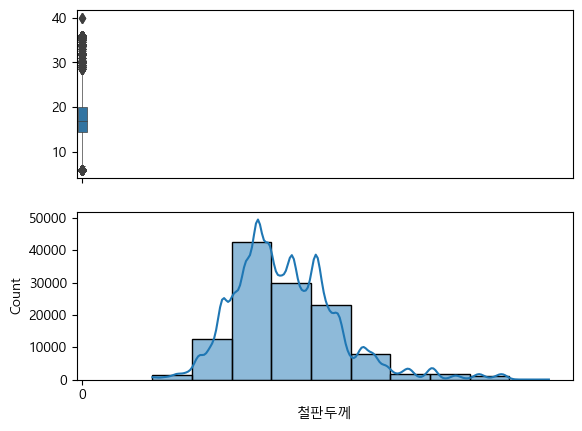

<Figure size 2000x2000 with 0 Axes>

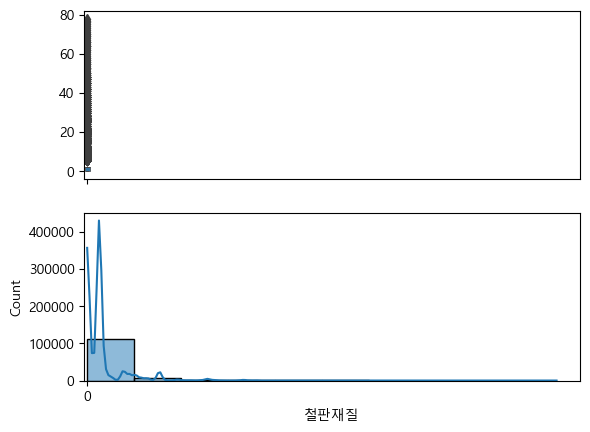

<Figure size 2000x2000 with 0 Axes>

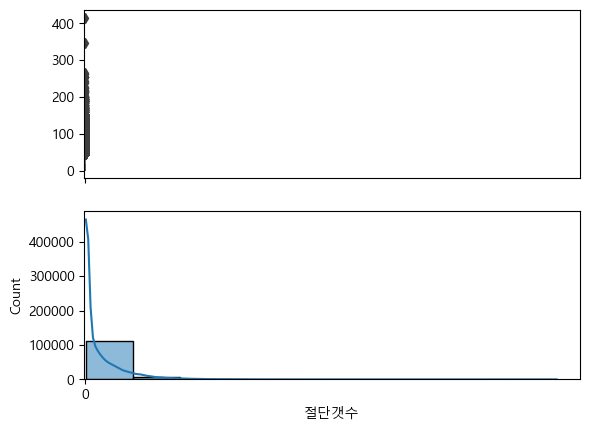

<Figure size 2000x2000 with 0 Axes>

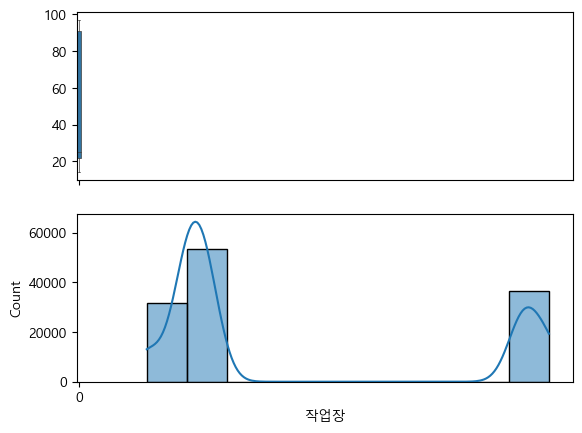

<Figure size 2000x2000 with 0 Axes>

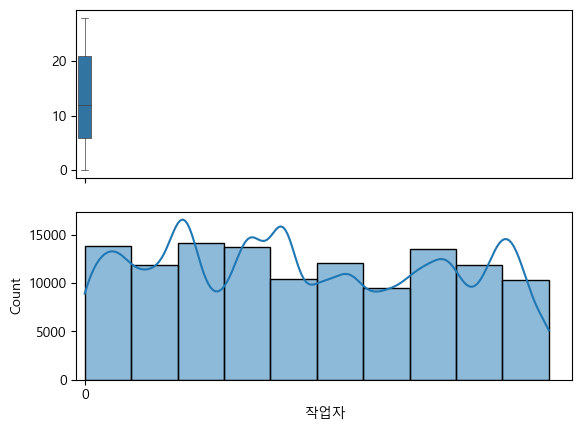

<Figure size 2000x2000 with 0 Axes>

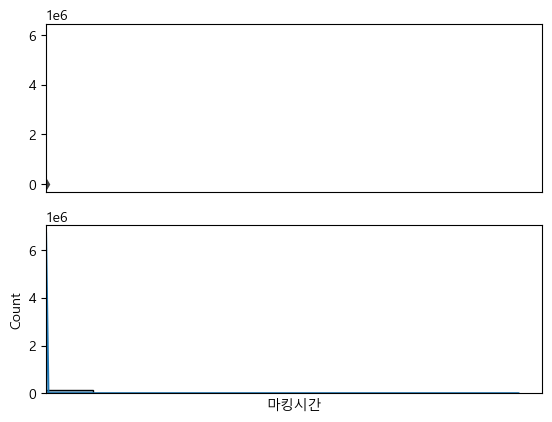

<Figure size 2000x2000 with 0 Axes>

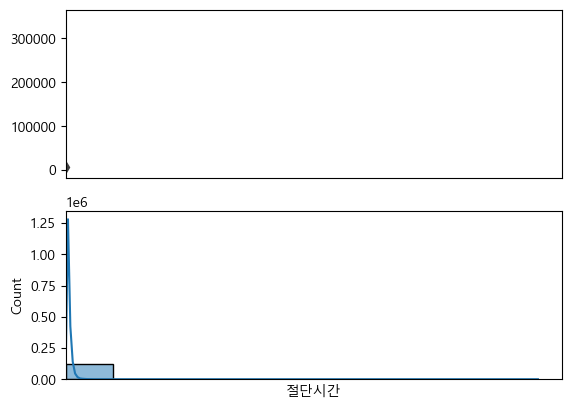

In [11]:
features = train.columns
numeric_features = train.select_dtypes('number').columns
categorical_features = train.select_dtypes('object').columns
for i in numeric_features:
  plt.figure(figsize = (20, 20))
  plt.tight_layout()
  f, (ax_box, ax_hist) = plt.subplots(2, sharex = True)
  sns.boxplot(train[i], ax = ax_box, linewidth = 0.5)
  sns.histplot(train[i], ax = ax_hist, bins = 10, kde = True)

c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


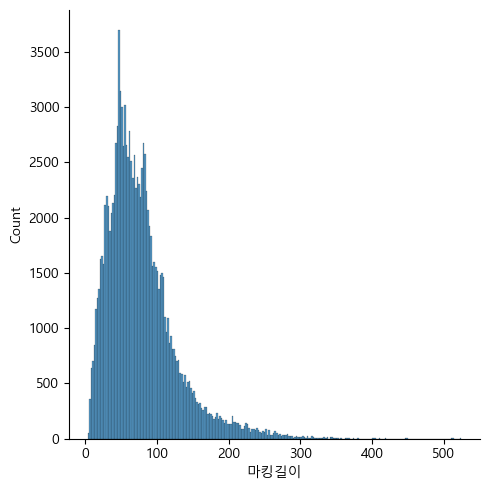

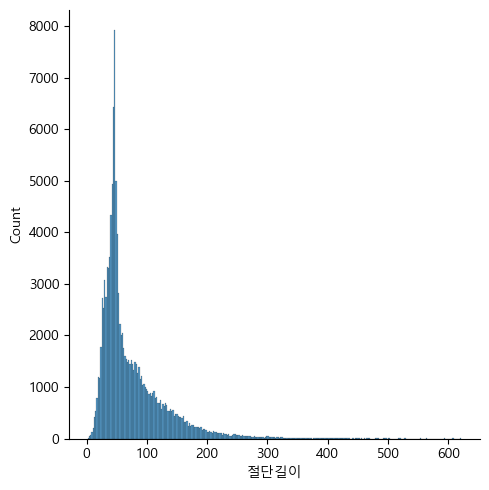

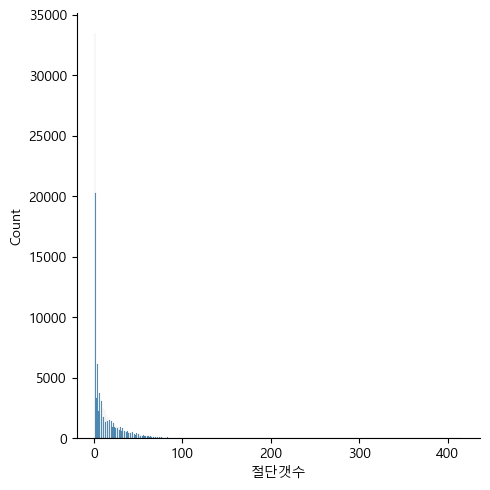

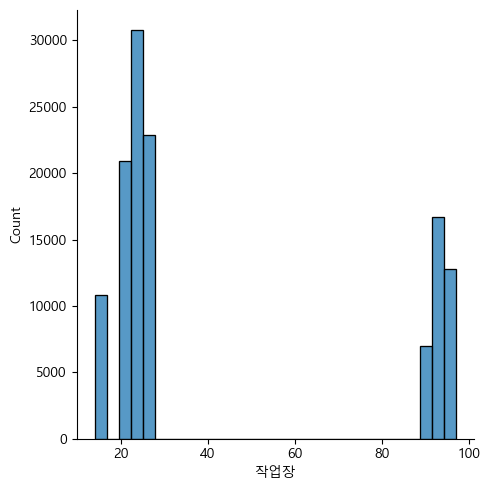

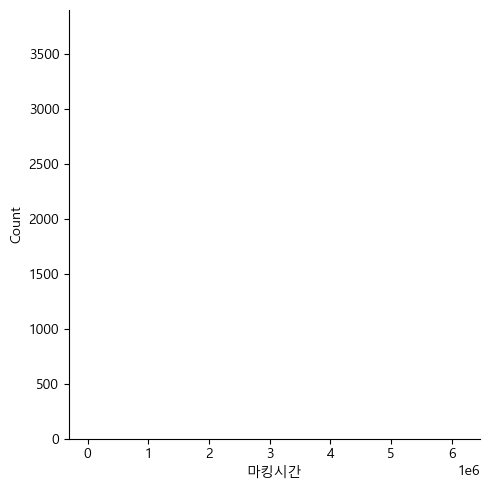

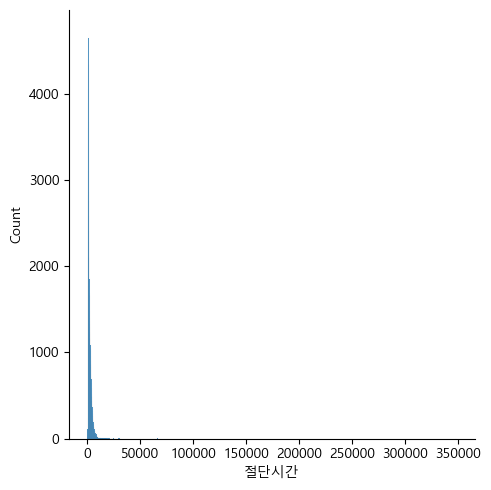

In [12]:
display(sns.displot(train['마킹길이']))
display(sns.displot(train['절단길이']))
display(sns.displot(train['절단갯수']))
display(sns.displot(train['작업장']))
display(sns.displot(train['마킹시간']))
display(sns.displot(train['절단시간']))

In [13]:
# variables = ['작업번호', '마킹길이', '절단길이', '철판두께', '철판재질', '절단갯수', '작업장', '작업자', '마킹시간', '절단시간']

numeric_columns = train.select_dtypes(include=np.number).columns

for var in numeric_columns:
    skewness = skew(train[var])
    kurt = kurtosis(train[var])
    
    print(f' {var}의 왜도: {skewness}')
    print(f' {var}의 첨도: {kurt}\n')

 작업번호의 왜도: 0.002526001389359533
 작업번호의 첨도: -1.1994096231932934

 마킹길이의 왜도: 1.5342480744471783
 마킹길이의 첨도: 3.6442037894546786

 절단길이의 왜도: 2.2075296710376824
 절단길이의 첨도: 7.438586381057563

 철판두께의 왜도: 0.9386827192407282
 철판두께의 첨도: 1.8334935914601536

 철판재질의 왜도: 5.119681304616308
 철판재질의 첨도: 42.392405906084065

 절단갯수의 왜도: 3.020271373124679
 절단갯수의 첨도: 14.246940911847457

 작업장의 왜도: 0.8491572732534536
 작업장의 첨도: -1.218014439443876

 작업자의 왜도: 0.09713242211582016
 작업자의 첨도: -1.2162359819822333

 마킹시간의 왜도: 109.34036985339624
 마킹시간의 첨도: 12603.309922710854

 절단시간의 왜도: 57.97279970958336
 절단시간의 첨도: 8419.479027113046



In [14]:
# for col in numeric_columns:
#     train[col] = np.log1p(train[col])

# skewness = train[numeric_columns].skew()
# kurtosis = train[numeric_columns].kurtosis()

# print("각 변수의 왜도:")
# print(skewness)

# print("각 변수의 첨도:")
# print(kurtosis)

for col in numeric_columns:
    if (train[col] > 0).all():
        transformed_data, lambda_value = stats.boxcox(train[col])
        train[col] = transformed_data

    else:
        print(f"변수 '{col}'에 음수 값이 있습니다.")
        train[col] = np.log1p(train[col])

skewness = train[numeric_columns].skew()
kurtosis = train[numeric_columns].kurtosis()
print("각 변수의 왜도:")
print(skewness)

print("각 변수의 첨도:")
print(kurtosis)

변수 '철판재질'에 음수 값이 있습니다.
변수 '작업자'에 음수 값이 있습니다.
변수 '마킹시간'에 음수 값이 있습니다.
변수 '절단시간'에 음수 값이 있습니다.
각 변수의 왜도:
작업번호   -0.291735
마킹길이    0.008332
절단길이   -0.006415
철판두께    0.003215
철판재질    0.695799
절단갯수    0.119422
작업장     0.206573
작업자    -1.120021
마킹시간   -3.183576
절단시간   -1.411988
dtype: float64
각 변수의 첨도:
작업번호    -1.003186
마킹길이     0.184736
절단길이     0.342033
철판두께     0.671703
철판재질     0.362745
절단갯수    -1.425055
작업장     -0.867345
작업자      0.683471
마킹시간    13.688865
절단시간    16.357298
dtype: float64


In [15]:
# train['절단길이'] = np.log1p(train['절단길이'])
# display(train['절단길이'].skew())

# train['마킹길이'] = pd.Series(stats.boxcox(train['마킹길이'])[0])
# display(train['마킹길이'].skew())

c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\dlwks\AppData\Lo

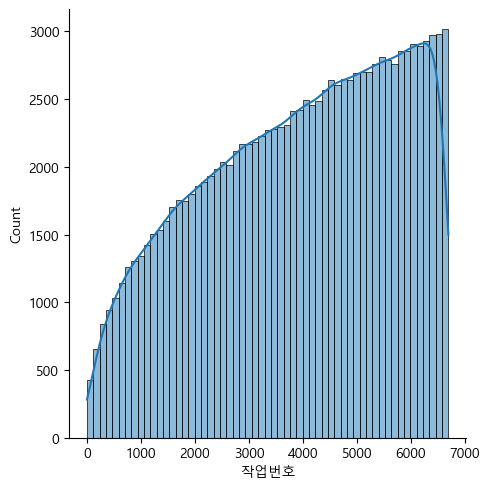

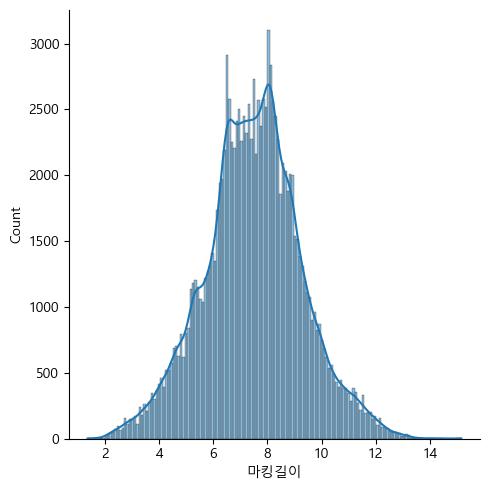

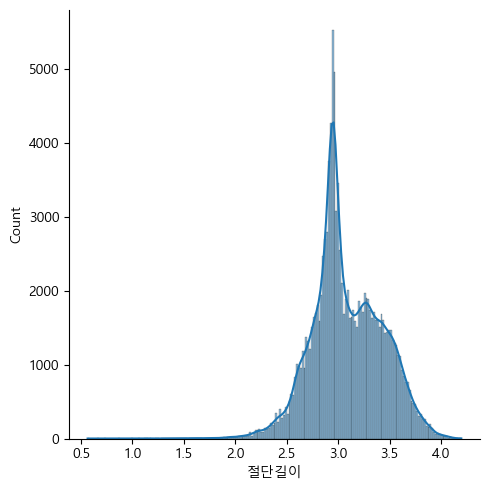

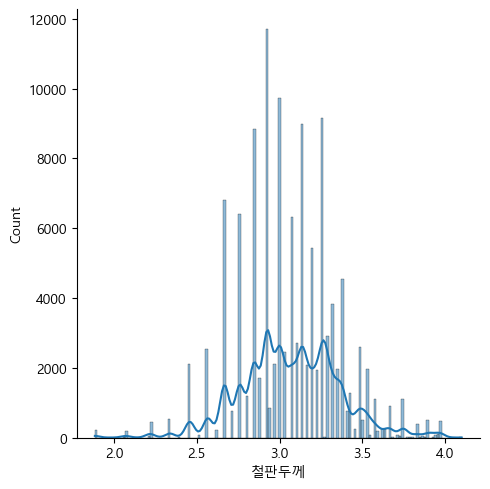

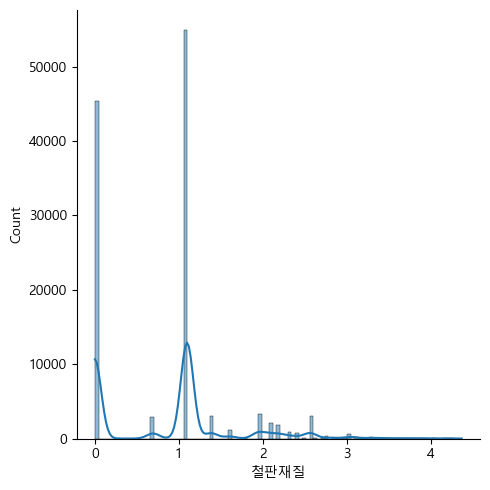

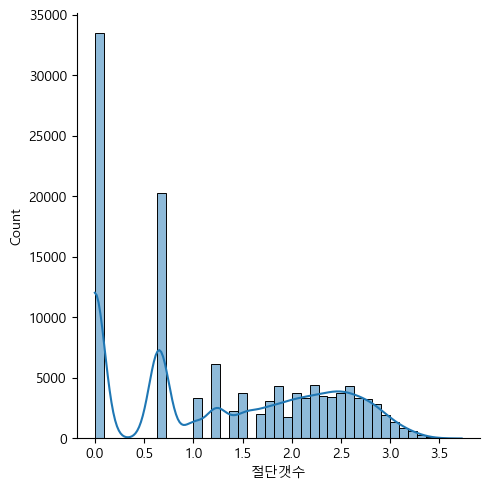

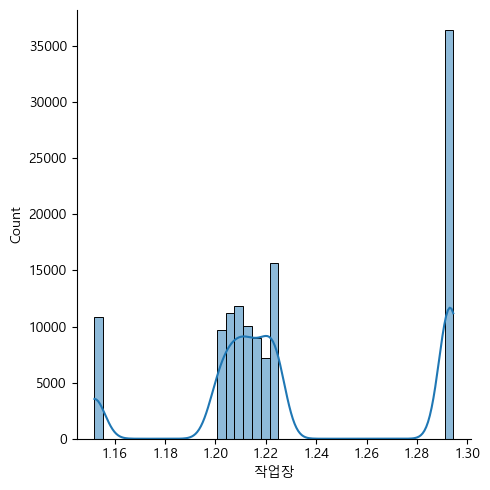

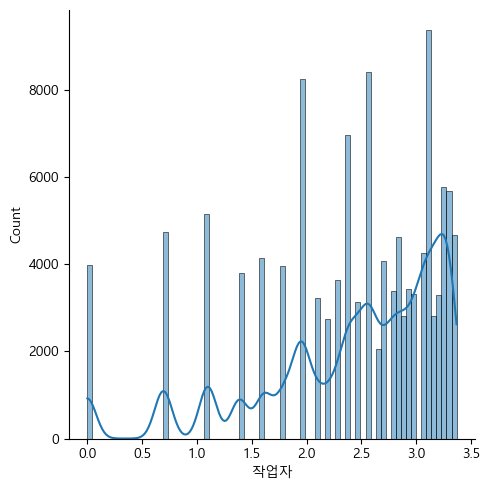

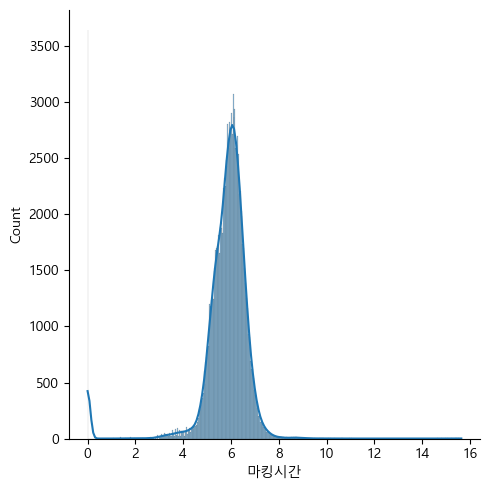

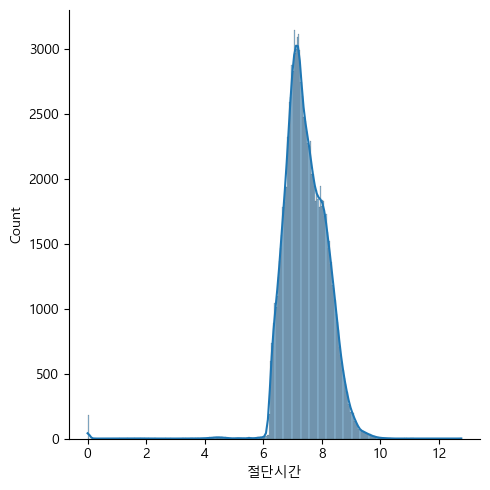

In [16]:
# plt.hist(train['절단길이'])
# plt.hist(train['마킹길이'])

for col in numeric_columns:
    sns.displot(train[col], kde = True)

<Axes: >

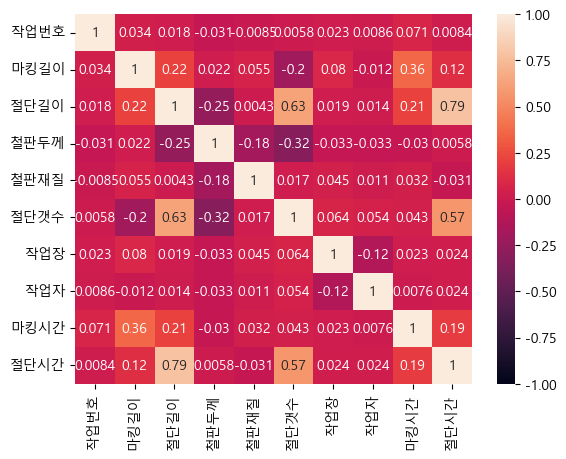

In [17]:
sns.heatmap(train.corr(), vmin = -1, vmax = 1, annot = True)

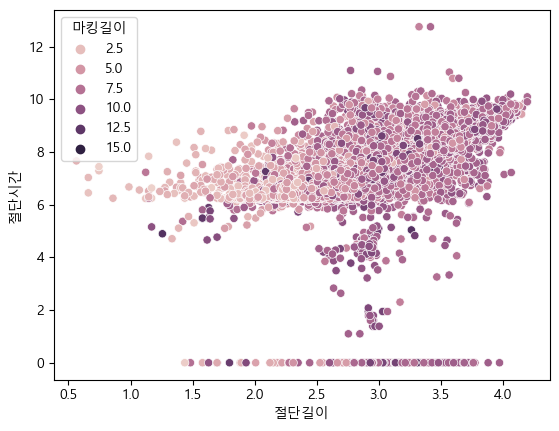

In [18]:
f = sns.scatterplot(x = '절단길이', y = '절단시간', hue = '마킹길이', data = train)

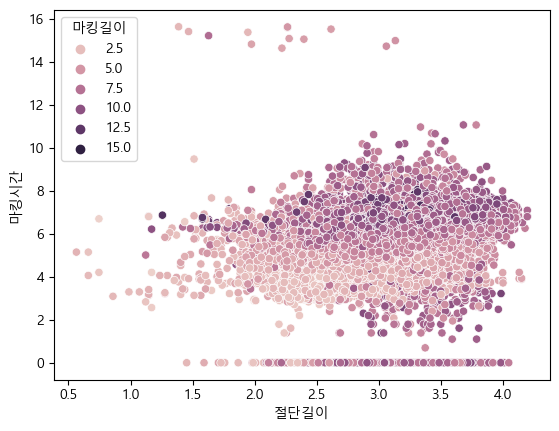

In [19]:
f = sns.scatterplot(x = '절단길이', y = '마킹시간', hue = '마킹길이', data = train)

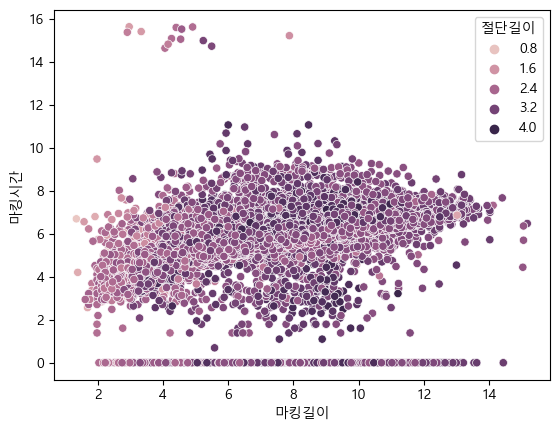

In [20]:
f = sns.scatterplot(x = '마킹길이', y = '마킹시간', hue = '절단길이', data = train)

In [21]:
def remove_outliers(df, col_name):
    uppper_bound = df[col_name].mean() + 5  * df[col_name].std()
    lower_bound = df[col_name].mean() - 5 * df[col_name].std()

    print(f"평균: {df[col_name].mean()}, 표준편차: {df[col_name].std()}")

    return df[(df[col_name] < uppper_bound) & (df[col_name] > lower_bound)]

columns_to_process = ['마킹길이', '절단길이', '철판두께', '철판재질', '절단갯수', '작업장', '작업자', '마킹시간', '절단시간']

for col in columns_to_process:
    train = remove_outliers(train, col)

평균: 7.478657825824708, 표준편차: 1.7911938998139814
평균: 3.084484827536983, 표준편차: 0.3406561578628292
평균: 3.0666592626548272, 표준편차: 0.296164960619279
평균: 0.8428308406797701, 표준편차: 0.7792366640793269
평균: 1.2899598250767035, 표준편차: 1.0491622538094216
평균: 1.231826324831418, 표준편차: 0.044008955800854024
평균: 2.40851664186866, 표준편차: 0.8313685346362718
평균: 5.738056902650709, 표준편차: 1.1974506361001167
평균: 7.444890195919508, 표준편차: 0.7286107075247491


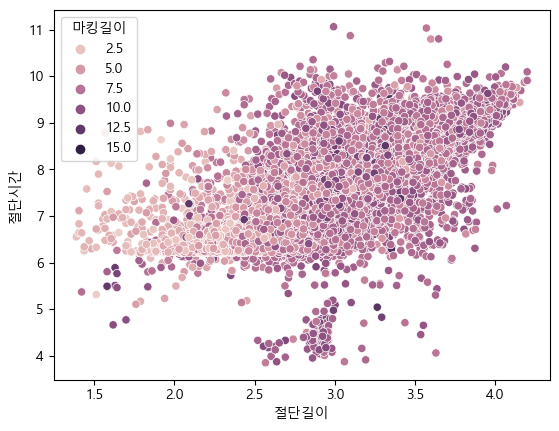

In [22]:
f = sns.scatterplot(x = '절단길이', y = '절단시간', hue = '마킹길이', data = train)

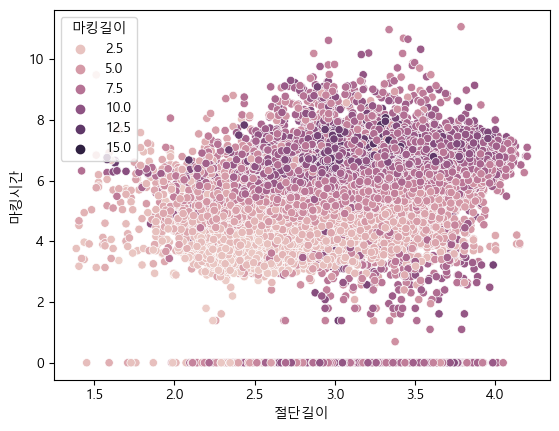

In [23]:
f = sns.scatterplot(x = '절단길이', y = '마킹시간', hue = '마킹길이', data = train)

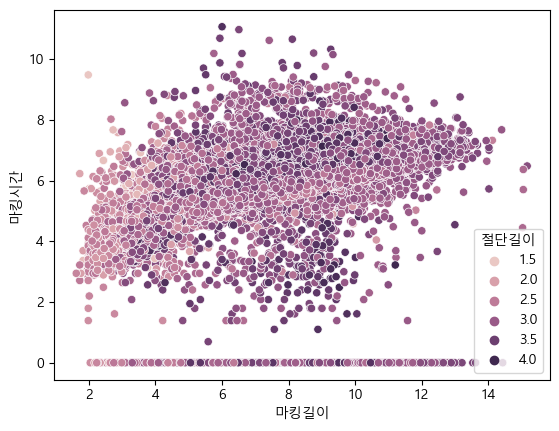

In [24]:
f = sns.scatterplot(x = '마킹길이', y = '마킹시간', hue = '절단길이', data = train)

In [25]:
scaler = StandardScaler()

X_train = train.drop(columns = ['마킹시간', '절단시간'])
Y_train = train[['마킹시간', '절단시간']]

X_test = test[X_train.columns]

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['작업번호', '마킹길이', '절단길이', '철판두께', '철판재질', '절단갯수', '작업장', '작업자'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['작업번호', '마킹길이', '절단길이', '철판두께', '철판재질', '절단갯수', '작업장', '작업자'])
X = X_train_scaled[['마킹길이', '절단길이', '철판두께', '철판재질', '절단갯수', '작업장', '작업자']]

y1 = Y_train[['마킹시간']]
y2 = Y_train[['절단시간']]

X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y1, test_size = 0.2, random_state = 42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y2, test_size = 0.2, random_state = 42)

In [27]:
k = 5

kf = KFold(n_splits = k, shuffle = True, random_state = 42)

In [28]:
model1 = RandomForestRegressor()

model2 = RandomForestRegressor()

# model1 = XGBRegressor()

# model2 = XGBRegressor()

In [29]:
mae_scores1 = []
mae_scores2 = []

for train_idx, val_idx in kf.split(X_train1):
    X_train_fold, X_val_fold = X_train1.iloc[train_idx], X_train1.iloc[val_idx]
    y_train1_fold, y_val1_fold = y_train1.iloc[train_idx], y_train1.iloc[val_idx]
    y_train2_fold, y_val2_fold = y_train2.iloc[train_idx], y_train2.iloc[val_idx]

    model1.fit(X_train_fold, y_train1_fold)
    model2.fit(X_train_fold, y_train2_fold)

    y_pred1 = model1.predict(X_val_fold)
    y_pred2 = model2.predict(X_val_fold)

    mae1 = mean_absolute_error(y_val1_fold, y_pred1)
    mae2 = mean_absolute_error(y_val2_fold, y_pred2)

    mae_scores1.append(mae1)
    mae_scores2.append(mae2)

print(f'Y1에 대한 평균 MAE: {np.mean(mae_scores1)}')
print(f'Y2에 대한 평균 MAE: {np.mean(mae_scores2)}')

c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConvers

Y1에 대한 평균 MAE: 0.46833500464138955
Y2에 대한 평균 MAE: 0.11550975919105451


In [30]:
model1.fit(X_train1, y_train1)

c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [31]:
model2.fit(X_train2, y_train2)

c:\Users\dlwks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [32]:
pred1 = model1.predict(X_val1)

In [33]:
pred2 = model2.predict(X_val2)

In [34]:
mae1 = mean_absolute_error(y_val1, pred1)
print(f'MAE : {mae1}')

MAE : 0.46979376561532904


In [35]:
mae2 = mean_absolute_error(y_val2, pred2)
print(f'MAE : {mae2}')

MAE : 0.11232373061512876


In [36]:
y_pred1 = model1.predict(X_test_scaled[['마킹길이', '절단길이', '철판두께', '철판재질', '절단갯수', '작업장', '작업자']])
y_pred2 = model2.predict(X_test_scaled[['마킹길이', '절단길이', '철판두께', '철판재질', '절단갯수', '작업장', '작업자']])

In [37]:
total_prediction = y_pred1 + y_pred2